In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
spam=pd.read_csv('spambase_csv.csv')
spam

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [3]:
x=spam.drop(labels=['class'],axis=1)
x.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [4]:
x=spam.iloc[:,:-1]
y=spam.iloc[:,-1]


In [5]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4596    0
4597    0
4598    0
4599    0
4600    0
Name: class, Length: 4601, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

In [7]:
x.shape

(4601, 57)

In [8]:
from sklearn.naive_bayes import GaussianNB    #continous
gnb=GaussianNB()
gnb.fit(x_train,y_train) #training

GaussianNB()

In [9]:
x_test.shape

(1151, 57)

In [10]:
y_pred=gnb.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [11]:
gnb.predict([[5.8,4.,1.2,0.2,5.8,4.,1.2,0.2,5.8,4.,1.2,0.2,5.8,4.,1.2,0.2,5.8,4.,1.2,0.2,5.8,4.,1.2,0.2,5.8,4.,1.2,0.2,5.8,4.,1.2,0.2
             ,5.8,4.,1.2,0.2,5.8,4.,1.2,0.2,5.8,4.,1.2,0.2,5.8,4.,1.2,0.2,5.8,4.,1.2,0.2,5.8,4.,1.2,9.,9.]]) #new data

C:\Users\Abdul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [12]:
gnb.predict([[5.8,4.,1.2,0.2,5.8,4.,1.2,0.2,5.8,4.,1.2,0.2,5.8,4.,1.2,0.2,5.8,4.,1.2,0.2,5.8,4.,1.2,0.2,5.8,4.,1.2,0.2,5.8,4.,1.2,0.2
             ,5.8,4.,1.2,0.2,5.8,4.,1.2,0.2,5.8,4.,1.2,0.2,5.8,4.,1.2,0.2,5.8,4.,1.2,0.2,5.8,4.,1.2,9.,9.]]) #new data

C:\Users\Abdul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [13]:
y_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [14]:
y_test

1351    1
1687    1
1297    1
2101    0
3920    0
       ..
1089    1
929     1
1545    1
4356    0
936     1
Name: class, Length: 1151, dtype: int64

In [15]:
gnb.score(x_test,y_test)

0.8175499565595135

In [16]:
#comparing actaul response values (y_test) with predicted response values(y_pred)
from sklearn import metrics
print('Gaussian Naive Bayes model accuracy(in%):',metrics.accuracy_score(y_test,y_pred)*100)

Gaussian Naive Bayes model accuracy(in%): 81.75499565595135


In [17]:
gnb.class_count_    #number of traning samples observed to each class

array([2087., 1363.])

In [18]:
gnb.class_prior_    #probabilty of each class.

array([0.60492754, 0.39507246])

In [19]:
gnb.classes_

array([0, 1], dtype=int64)

In [20]:
gnb.epsilon_

0.00035317461994950643

In [21]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[519 182]
 [ 28 422]]


In [22]:
import seaborn as sns

In [23]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.74      0.83       701
           1       0.70      0.94      0.80       450

    accuracy                           0.82      1151
   macro avg       0.82      0.84      0.82      1151
weighted avg       0.85      0.82      0.82      1151



In [24]:
from sklearn.naive_bayes import CategoricalNB,ComplementNB,MultinomialNB

In [25]:
cnb=CategoricalNB().fit(x_train,y_train)
comp_nb=ComplementNB().fit(x_train,y_train)
mul_nb=MultinomialNB().fit(x_train,y_train)

In [26]:
#x_test

In [27]:
cnb_ypred=cnb.predict(x_test)

IndexError: index 4 is out of bounds for axis 1 with size 3

In [40]:
mul_nb.score(x_test,y_test)

0.787141615986099

In [41]:
comp_nb.score(x_test,y_test)

0.789748045178106

In [42]:
cnb.score(x_test,y_test)

IndexError: index 4 is out of bounds for axis 1 with size 3

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(x_train,y_train)

In [43]:
y_pred=bnb.predict(x_test)
y_pred

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [44]:
y_test

1351    1
1687    1
1297    1
2101    0
3920    0
       ..
1089    1
929     1
1545    1
4356    0
936     1
Name: class, Length: 1151, dtype: int64

In [45]:
bnb.predict([[5.8,4.,1.2,0.2,5.8,4.,1.2,0.2,5.8,4.,1.2,0.2,5.8,4.,1.2,0.2,5.8,4.,1.2,0.2,5.8,4.,1.2,0.2,5.8,4.,1.2,0.2,5.8,4.,1.2,0.2
             ,5.8,4.,1.2,0.2,5.8,4.,1.2,0.2,5.8,4.,1.2,0.2,5.8,4.,1.2,0.2,5.8,4.,1.2,0.2,5.8,4.,1.2,9.,9.]]) #new data

C:\Users\Abdul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [46]:
bnb.classes_

array([0, 1], dtype=int64)

In [47]:
bnb.score(x_test,y_test)

0.891398783666377

In [48]:
from sklearn import metrics
print('Bernoulli Naive Bayes model accuracy(in%):',metrics.accuracy_score(y_test,y_pred)*100)

Bernoulli Naive Bayes model accuracy(in%): 89.1398783666377


In [49]:
bnb.class_count_  

array([2087., 1363.])

In [50]:
bnb.classes_

array([0, 1], dtype=int64)

In [51]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[663,  38],
       [ 87, 363]], dtype=int64)

<AxesSubplot:>

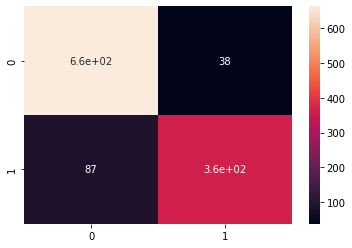

In [52]:
import seaborn as sns
sns.heatmap(cm,annot=True)

In [53]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       701
           1       0.91      0.81      0.85       450

    accuracy                           0.89      1151
   macro avg       0.89      0.88      0.88      1151
weighted avg       0.89      0.89      0.89      1151

